<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%98%E3%82%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%88%86%E9%A1%9E%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%98%E3%82%99%E3%83%AB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **分類コース**


---


分類コースでは、**データのカテゴリーを予測する機械学習モデル「決定木」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル３（★★★☆☆）

---
レベル３では、データの結合を扱います。これまでは、1つの表データを加工し、モデルを構築しましたが、今回は、2つの表データがあるときの結合方法ついて学びます。データの結合は、異なるデータベースからデータを抽出する場合やデータの重複を避けて分けて保存されている場合などに必要となります。

##3.1.データの理解

今回は、毒キノコの外観だけでなく、匂いに関する情報も使用して、分類タスクに取り組みます。これまでどおり以下のリンクからキノコの外観データと匂いに関するデータを共にダウンロードし、所定の位置にアップロードし、ファイルを読み込んでみましょう。そして、今回扱う匂いデータを表示して中身を確認しましょう。

[毒キノコの外観データ.csv](https://drive.google.com/file/d/18oIhPQ4iOYoVolKMjzt1Kyek0x_WhSEW/view?usp=drive_link)

[毒キノコの匂いデータ.csv](https://drive.google.com/file/d/1f58PLh0RiZqvNa_lan2pu7tHubAeqgO3/view?usp=drive_link)

In [ ]:
import pandas as pd

df1 = pd.read_csv('毒キノコの外観データ.csv')
df2 = pd.read_csv('毒キノコの匂いデータ.csv')

df2.head()

匂いデータには、IDと匂い(odor)に関する情報があることがわかります。次にデータの数を確認します。

In [ ]:
print('外観データの数', len(df1))
print('匂いデータの数', len(df2))

外観データの数に比べて、匂いデータの数は4件ほど少ないことが確認できます。

両データは、UC Irvine Machine Learning Repositoryで公開されているデータを学習用に加工しています。（
https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
）

匂いの種類をレベル1でも使用したuniqueメソッドで確認してみましょう。

In [ ]:
#色の種類を確認
df2['odor'].unique()

9種類のデータが含まれていると分かります。アルファベット小文字で記載された略称の意味は以下の表のようになっています。

| 略称  | 匂い |
|-----|------|
| p | 辛味 |
| a | アーモンド |
| l | アニス |
| n | なし |
| f | ファウル |
| c | クレオソート |
| y | フィッシュ |
| s | スパイシー |
| m | ミューズイ |  

匂いデータのIDは、これまで扱っていた毒キノコの外観データのIDに対応しています。つまり、IDが同じ行のデータは、同じキノコの特徴についての情報となります。そこで、このIDに対応させてデータを結合させ、特徴量に斑点と色、匂いを用いて毒キノコがどうかを予測する分類モデルを構築してみましょう。

##3.2. データの前処理

DataFrameオブジェクトの結合には、pandasのmerge関数を使用します。引数に、結合したい2つのDataFrameオブジェクトを入力します。同じ名前の列名IDを認識して、その列を基準に結合されます。

In [ ]:
#内部結合（外観データdf1 ＋ 匂いデータdf2）
df = pd.merge(df1, df2)
df.head()

In [ ]:
len(df)

結合後のデータ数は、結合前の外観データの数より少なくなっており、匂いデータの数と同じになっています。merge関数では、デフォルトで内部結合になっているため、データ数が少なくなっています。次に、結合方法の違いについて確認します。

>**[merge関数の結合方法]**
>
>表データの同士の結合方法として、**内部結合**と**左外部結合**と**完全外部結合**がよく使用されます。内部結合では、異なるテーブル間で特定列に一致するデータを結合し、一致しない行は削除されます。左外部結合では、異なるテーブル間で左の特定列にある全てのデータを結合して抽出しますが、右のテーブルに一致しないデータは欠損値となります。完全外部結合は、両テーブルに一致しない行は欠損値として、全てのデータを結合します。pandasのmerge関数では、引数`how`に`inner`（内部結合）や`left`（左外部結合）、`outer`（完全外部結合）を指定して結合様式を切り替えられます。

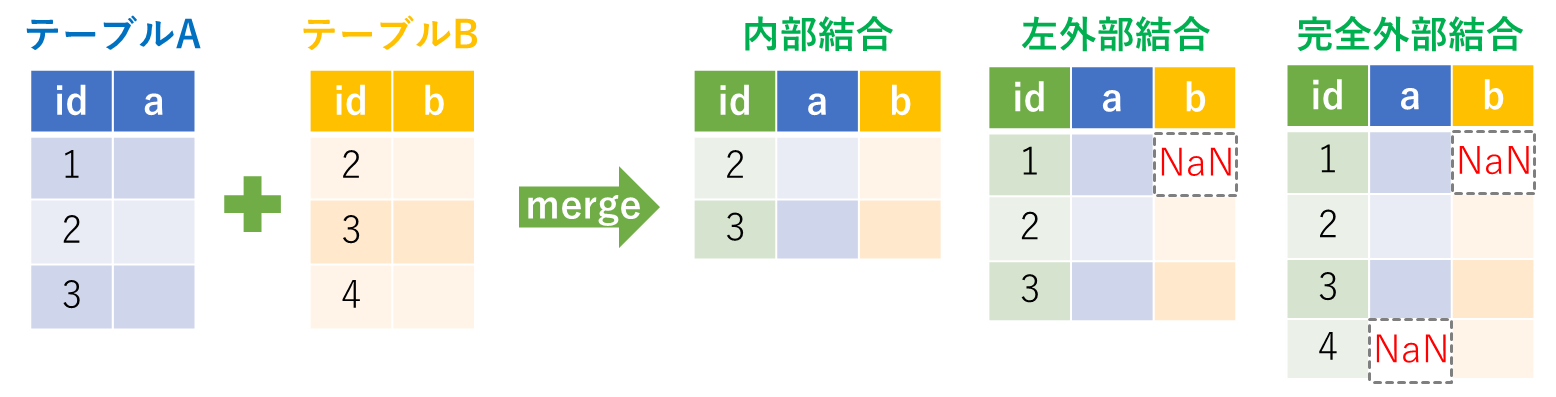

今回、内部結合したデータ数が匂いデータ数と同じとなっていることから、匂いデータのIDは、外観データのIDに全て含まれていると考えられます。特定の列のデータが他の列データに含まれているかどうかを調べる方法には、isinメソッドが使用できます。以下のコードセルでは、df1のID列の各データがdf2のID列のデータに含まれるか確認しています。

In [ ]:
#df1のID列の各データがdf2のID列のデータに含まれるか確認（含まれる➤True、含まれない➤False）
se_id1_is_in_id2 = df1['ID'].isin(df2['ID'])
se_id1_is_in_id2.head()

isinメソッドは、かっこ内の引数に含まれるデータをTrue、含まれないデータをFalseとした真偽値（bool）型の値を持つSeriesオブジェクトを返します。df1のIDデータのうち、何件のデータが含まれなかったか確認します。真偽値型の値を持つSeriesオブジェクトのTrueの数を数える方法にsumメソッドが使用できますが、今回は含まれないFalseの数を調べるため、いったんFalseをTrue、TrueをFalseに変換してsumメソッドを使用したいと思います。真偽値を反転させるには、Seriesオブジェクトの前に`~`（チルダ）記号を付けます。

In [ ]:
se_id1_is_not_in_id2 = ~se_id1_is_in_id2
se_id1_is_not_in_id2.head()

In [ ]:
se_id1_is_not_in_id2.sum()

In [ ]:
#df2のうちdf1に含まれない数
se_id2_is_in_id1 = df2['ID'].isin(df1['ID'])
se_id2_is_not_in_id1 = ~se_id2_is_in_id1
se_id2_is_not_in_id1.sum()

df2のうちdf1に含まれない数が0件であることから、df2のIDは全てdf1に含まれることを確認できます。

次にdf1のうちdf2に含まれないデータがどのIDかを確認したいと思います。すでに、含まれないデータについての真偽値のSeriesオブジェクトがあるため、レベル２で学んだloc属性を利用して抽出してみましょう。

In [ ]:
df1.loc[se_id1_is_not_in_id2, 'ID']

抽出したSeriesオブジェクトの表示結果から、ID（1, 617, 2387, 6081）の4件がdf2には含まれていなかったことが確認できます。そのため、内部結合では、結合後、4件少なくなっていました。それでは、左外部結合をした場合は、データ数はどうなるでしょうか。引数`how`に`left`を指定して、外観データ（左）に匂いデータ（右）を左外部結合してみましょう。

In [ ]:
df_left = pd.merge(df1, df2, how='left')
df_left.head()

In [ ]:
len(df_left)

さきほど、ID（1）であった箇所がNaNとなっており、データ数も8124と減っていないのが分かります。欠損値を確認してみると含まれていなかった4件となっています。

In [ ]:
df_left.isnull().sum()

今回はdf2のIDがdf1に全て含まれているため、左外部結合と完全外部結合の内容は同じとなります。次にdropnaメソッドを使用して、外観データの欠損値を削除してモデルを構築してみます。外部結合をしてもどのみち欠損値は削除されるため、今回は、内部結合したDataFrameオブジェクトを代入したdfを使用します。

In [ ]:
df_drop = df.dropna()
df_drop.head()

それでは、結合したDataFrameオブジェクトの特徴量をダミー変数化します。今回は、新たに加わった匂い（odor）の列も含めます。

In [ ]:
df_dummy = pd.get_dummies(df_drop[['cap_color', 'bruises', 'odor']], drop_first= True)

変数xを特徴量、変数yにラベルを代入し、訓練データとテストデータに分離します。

In [ ]:
from sklearn.model_selection import train_test_split

x = df_dummy
y = df_drop['poison']

#訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y)

##3.3.モデルの構築と評価

あとはこれまで通りモデルを構築し、評価します。

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

test_score = model.score(x_test, y_test)
round(test_score, 3)

正解率が9割以上となりました。外観データに匂いデータを結合したデータを利用してモデルを構築することで予測精度の向上につながりました。レベル３の内容は以上です。最後の演習問題では、結合様式の異なる方法で2つの表データを結合する演習に取り組み、結合したデータがどのように変わるかを確認し、結合様式の理解度を高めましょう。

##3.4.演習問題

レベル３の内容確認問題です。解答・解説は動画を参考にしてください。

問3-1.以下のTableAとBの2つがある場合、列名'column2'を基準に内部結合をすると何行のTableとなるか、pandasのDataFrameを使用して確かめてみてください。

TableA

column1| column2
------|------|
1 | b |
2 |  t |
3 |  a |

TableB

column2 | column3
------|------|
a | 0.1 |
b | 0.5 |
c |  0.7 |

問3-2.問3-1で扱ったTableAとBの2つがある場合、列名'column2'を基準にTableAを左として左外部結合をすると何行のTableとなるか、pandasのDataFrameを使用して確かめてみてください。

問3-3.問3-1で扱ったTableAとBの2つがある場合、列名'column2'を基準に完全外部結合をすると何行のTableとなるか、pandasのDataFrameを使用して確かめてみてください。

問3-4.問3-3の完全外部結合したDataFrameオブジェクトの列名'column2'のデータのうち、何件のデータが問3-1の内部結合したDataFrameオブジェクトの列名'column2'のデータに含まれている数を確認してみてください。